In [53]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('/content/연도별 1인개인소득.csv',encoding = "CP949",engine = 'python')
df2 = pd.read_csv('/content/연도별 소비자물가지수.csv',encoding = "CP949",engine = 'python')

In [3]:
df1

,연도,1인당 개인소득
0,2002,8929
1,2003,9454
2,2004,10075
3,2005,10417
4,2006,10994
5,2007,11365
6,2008,12006
7,2009,12660
8,2010,13326
9,2011,13376


In [4]:
df2

,연도,물가지수
0,2002,67.795
1,2003,70.279
2,2004,73.019
3,2005,75.363
4,2006,77.291
5,2007,79.220
6,2008,83.120
7,2009,85.387
8,2010,87.954
9,2011,91.561


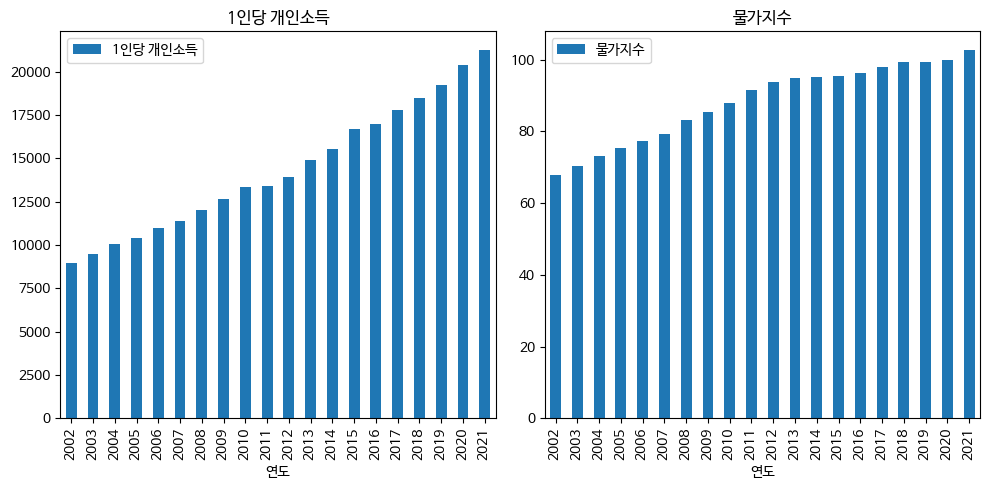

In [5]:
df1.set_index('연도', inplace=True)
df2.set_index('연도', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df1.plot(kind='bar', ax=ax[0])
df2.plot(kind='bar', ax=ax[1])
ax[0].set_title('1인당 개인소득')
ax[1].set_title('물가지수')
plt.tight_layout()
plt.show()

In [6]:
from matplotlib.cm import datad
# 데이터 합치기
data = pd.merge(df1, df2, on='연도',how='left')

data

,1인당 개인소득,물가지수
연도,,
2002,8929,67.795
2003,9454,70.279
2004,10075,73.019
2005,10417,75.363
2006,10994,77.291
2007,11365,79.220
2008,12006,83.120
2009,12660,85.387
2010,13326,87.954


In [22]:
# 넘파이로 불러오기위한 준비

data_income= data.loc[:,'1인당 개인소득']
data_price_index= data.loc[:,'물가지수']

print(data_income,data_price_index)

연도
2002     8929
2003     9454
2004    10075
2005    10417
2006    10994
2007    11365
2008    12006
2009    12660
2010    13326
2011    13376
2012    13948
2013    14892
2014    15509
2015    16703
2016    16952
2017    17788
2018    18458
2019    19216
2020    20393
2021    21262
Name: 1인당 개인소득, dtype: int64 연도
2002     67.795
2003     70.279
2004     73.019
2005     75.363
2006     77.291
2007     79.220
2008     83.120
2009     85.387
2010     87.954
2011     91.561
2012     93.753
2013     94.867
2014     95.309
2015     95.515
2016     96.171
2017     98.036
2018     99.437
2019     99.343
2020    100.000
2021    102.770
Name: 물가지수, dtype: float64


In [35]:
# 1인당 개인소득
income = np.array(data_income)

# 물가지수
price_index = np.array(data_price_index)

[ 8929  9454 10075 10417 10994 11365 12006 12660 13326 13376 13948 14892
 15509 16703 16952 17788 18458 19216 20393 21262]


In [27]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(income, price_index, random_state=42)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

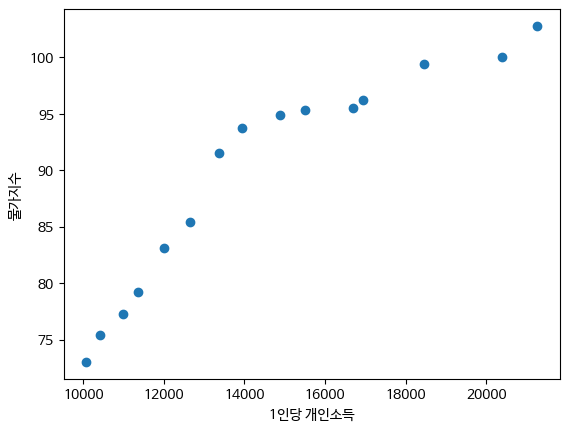

In [28]:
# 산점도 그리기
plt.scatter(train_input,train_target)
plt.xlabel('1인당 개인소득')
plt.ylabel('물가지수')

plt.show()

In [29]:
#1인당 개인소득 = a * (물가지수=x) + b
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [31]:
# a값과 b값 구하기
print(lr.coef_,lr.intercept_)

[0.00255131] 52.26802890806545


회귀식:y = [0.00255131]x + 52.26802890806545


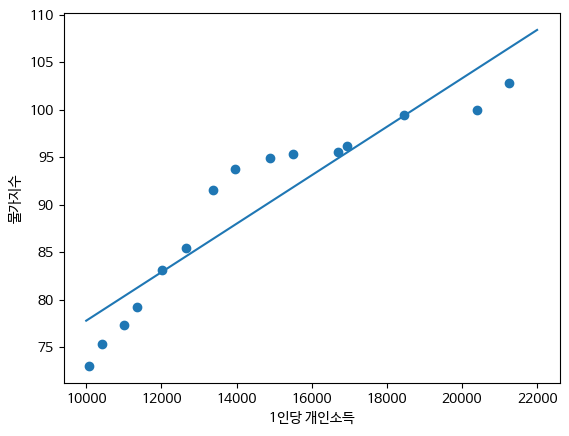

In [44]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 10000~22000 값사이의 1차 방정식 그래프
plt.plot([10000,22000],[10000*lr.coef_+lr.intercept_, 22000*lr.coef_+lr.intercept_])

# 회귀식 출력
print(f"회귀식:y = {lr.coef_}x + {lr.intercept_}")
plt.xlabel('1인당 개인소득')
plt.ylabel('물가지수')
plt.show()

In [42]:
# 개인소득이 2500만원이 되면 물가지수는 ?
print(lr.predict([[25000]]))

[116.05079755]


In [43]:
# 개인소득이 3000만원이 되면 ?
print(lr.predict([[30000]]))

[128.80735127]
